In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_theme()

In [6]:
# Axis
start_freq = 1
stop_freq = 41
window_freq = 1
overlap_freq = 3
fmin_s = np.array(0.01)
fmin = np.arange(start_freq,stop_freq - overlap_freq, window_freq)
fmin_range = np.append(fmin_s,fmin)
fmax_range = np.arange(start_freq + overlap_freq, stop_freq, window_freq)

freqs = []

for i in range(len(fmax_range)):
    freqs.append(f"{fmin_range[i]}-{fmax_range[i]}")

start_time = 0
stop_time = 2.000
window_time = 0.500
overlap_time = 0.250
tmin_range = np.arange(start_time, stop_time - overlap_time, overlap_time)
tmax_range = np.arange(start_time + window_time, stop_time + overlap_time , overlap_time)

times = []

for i in range(len(tmax_range)):
    times.append(f"{tmin_range[i]}-{tmax_range[i]}")

print(freqs)
print(times)

['0.01-4', '1.0-5', '2.0-6', '3.0-7', '4.0-8', '5.0-9', '6.0-10', '7.0-11', '8.0-12', '9.0-13', '10.0-14', '11.0-15', '12.0-16', '13.0-17', '14.0-18', '15.0-19', '16.0-20', '17.0-21', '18.0-22', '19.0-23', '20.0-24', '21.0-25', '22.0-26', '23.0-27', '24.0-28', '25.0-29', '26.0-30', '27.0-31', '28.0-32', '29.0-33', '30.0-34', '31.0-35', '32.0-36', '33.0-37', '34.0-38', '35.0-39', '36.0-40']
['0.0-0.5', '0.25-0.75', '0.5-1.0', '0.75-1.25', '1.0-1.5', '1.25-1.75', '1.5-2.0']


In [7]:
def plot(acc_train, acc_test, titles, xaxis, yaxis ):
    n = len(acc_train)
    f, axes = plt.subplots(n, 2,figsize=(20,10))
    for i in range(n):
        # create seabvorn heatmap with required labels
        sns.heatmap(acc_train[i], xticklabels=xaxis, yticklabels=yaxis, ax=axes[0], vmax= 100)
        sns.heatmap(acc_test[i], xticklabels=xaxis, yticklabels=yaxis, ax=axes[1], vmax= 100)
        axes[0].set_title(f'Train Acc {titles[i]}')
        axes[0].set_xlabel('Time Range')
        axes[0].set_ylabel('Freq Range')
        axes[1].set_title(f'Test Acc {titles[i]}')
        axes[1].set_xlabel('Time Range')
        axes[1].set_ylabel('Freq Range')

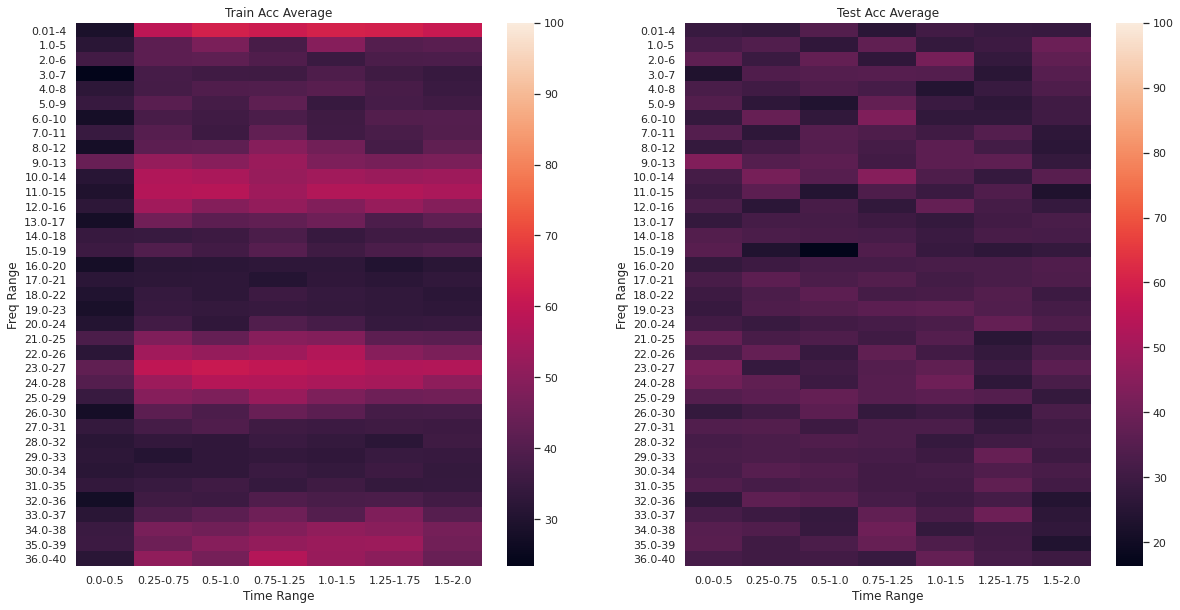

In [8]:

dfTrain = pd.read_csv("csv/classification_results_psd_chunked-Train.csv",header=None)
dfTest = pd.read_csv("csv/classification_results_psd_chunked-Test.csv",header=None)

train_acc = dfTrain.iloc[1:,1:].astype('float').to_numpy()
test_acc = dfTest.iloc[1:,1:].astype('float').to_numpy()

acc_train = [train_acc]
acc_test = [test_acc]
titles = ["Average"]

plot(acc_train, acc_test, titles, times, freqs)